               City                   Region                      Country  \
0     New York City               "New York"   "United States of America"   
1  Washington, D.C.   "District of Columbia"   "United States of America"   
2     San Francisco             "California"   "United States of America"   
3            Berlin                       ""                    "Germany"   
4       Los Angeles             "California"   "United States of America"   

   AirQuality  WaterPollution  
0   46.816038       49.504950  
1   66.129032       49.107143  
2   60.514019       43.000000  
3   62.364130       28.612717  
4   36.621622       61.299435  
        AirQuality  WaterPollution
count  3963.000000     3963.000000
mean     62.253452       44.635372
std      30.944753       25.663910
min       0.000000        0.000000
25%      37.686567       25.000000
50%      69.444444       50.000000
75%      87.500000       57.719393
max     100.000000      100.000000
<class 'pandas.core.frame.Data

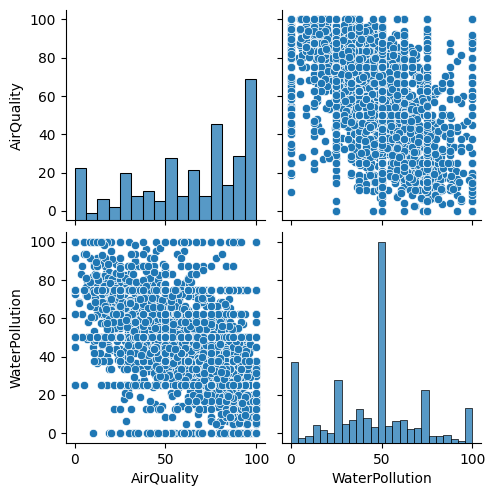

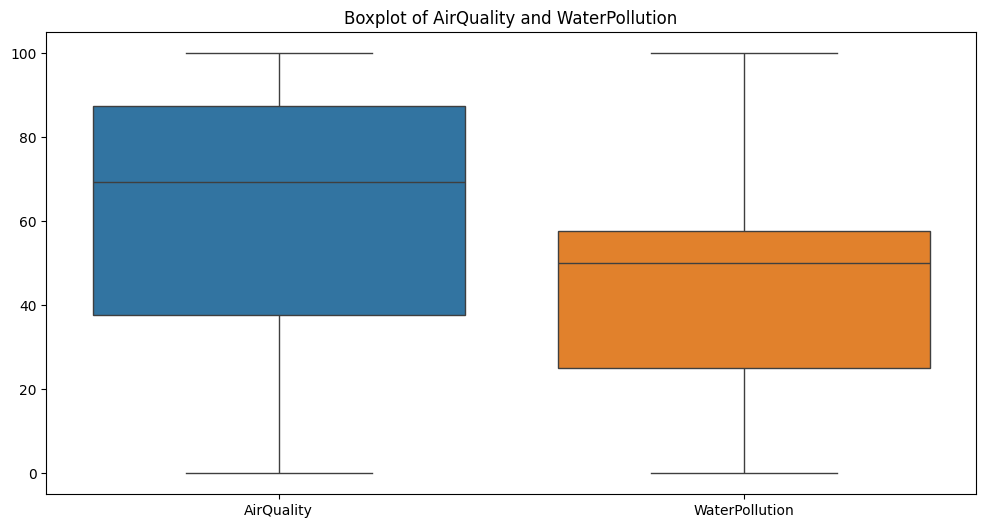

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = 'cities_air_quality_water_pollution.18-10-2021.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Data types of each column
print(df.info())

# Basic visualizations
# Pairplot for numerical columns
sns.pairplot(df[['AirQuality', 'WaterPollution']])
plt.show()

# Boxplot for AirQuality and WaterPollution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['AirQuality', 'WaterPollution']])
plt.title('Boxplot of AirQuality and WaterPollution')
plt.show()


In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

# Confirm that duplicates and missing values are handled
print("Duplicates:", df.duplicated().sum())
print("Missing Values:", df.isnull().sum().sum())


City              0
Region            0
Country           0
AirQuality        0
WaterPollution    0
dtype: int64
Duplicates: 0
Missing Values: 0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set threshold values for AirQuality and WaterPollution
air_quality_threshold = 50  # adjust this threshold based on your criteria
water_pollution_threshold = 65  # adjust this threshold based on your criteria

# Create the EnvironmentHealth variable
df['EnvironmentHealth'] = 'Good'  # Assume good by default
df.loc[(df['AirQuality'] > air_quality_threshold) | (df['WaterPollution'] > water_pollution_threshold), 'EnvironmentHealth'] = 'Bad'

# Define features (X) and target variable (y)
X = df[['AirQuality', 'WaterPollution']]
y = df['EnvironmentHealth'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3a: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Step 3b: SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


In [4]:
# Step 4: Evaluation

# Decision Tree Evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_classification_report)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)

# SVM Evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

print("\nSVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_classification_report)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       605
        Good       1.00      1.00      1.00       188

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weighted avg       1.00      1.00      1.00       793

Decision Tree Confusion Matrix:
 [[605   0]
 [  0 188]]

SVM Accuracy: 0.9886506935687264
SVM Classification Report:
               precision    recall  f1-score   support

         Bad       0.99      0.99      0.99       605
        Good       0.97      0.98      0.98       188

    accuracy                           0.99       793
   macro avg       0.98      0.99      0.98       793
weighted avg       0.99      0.99      0.99       793

SVM Confusion Matrix:
 [[600   5]
 [  4 184]]


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decision Tree
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# SVM
param_grid_svm = {'C': [1, 10], 'gamma': [0.1, 0.01], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found by grid search
print("\nBest parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Use the best models from grid search
best_dt_model = grid_search_dt.best_estimator_
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best models on the test set
best_dt_predictions = best_dt_model.predict(X_test)
best_svm_predictions = best_svm_model.predict(X_test)

# Decision Tree Evaluation after tuning
best_dt_accuracy = accuracy_score(y_test, best_dt_predictions)
best_dt_classification_report = classification_report(y_test, best_dt_predictions)
best_dt_confusion_matrix = confusion_matrix(y_test, best_dt_predictions)

print("\nBest Decision Tree Accuracy:", best_dt_accuracy)
print("Best Decision Tree Classification Report:\n", best_dt_classification_report)
print("Best Decision Tree Confusion Matrix:\n", best_dt_confusion_matrix)

# SVM Evaluation after tuning
best_svm_accuracy = accuracy_score(y_test, best_svm_predictions)
best_svm_classification_report = classification_report(y_test, best_svm_predictions)
best_svm_confusion_matrix = confusion_matrix(y_test, best_svm_predictions)

print("\nBest SVM Accuracy:", best_svm_accuracy)
print("Best SVM Classification Report:\n", best_svm_classification_report)
print("Best SVM Confusion Matrix:\n", best_svm_confusion_matrix)



Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None}
Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Best Decision Tree Accuracy: 1.0
Best Decision Tree Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       605
        Good       1.00      1.00      1.00       188

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weighted avg       1.00      1.00      1.00       793

Best Decision Tree Confusion Matrix:
 [[605   0]
 [  0 188]]

Best SVM Accuracy: 0.9987389659520807
Best SVM Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       605
        Good       0.99      1.00      1.00       188

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weighted avg       1.00      1.00      1.00    